### Pytorch Quiz
- CNN을 활용한 모델을 만들어서 정확도 95% 이상의 Classifier를 만드세요
- 코드 수정 가능

In [1]:
from matplotlib import pyplot as plt
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader

#### Dataset download

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
dataloader_train = DataLoader(train_data, 
                              batch_size=16, 
                              shuffle=True)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
dataloader_test = DataLoader(test_data, 
                              batch_size=16, 
                              shuffle=True)

0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


### CIFAR 가져오는 예시 코드

In [32]:
train_data = datasets.CIFAR10(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
dataloader_train = DataLoader(train_data, 
                              batch_size=16, 
                              shuffle=True)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
dataloader_test = DataLoader(test_data, 
                              batch_size=16, 
                              shuffle=True)

0it [00:00, ?it/s]

Extracting data/cifar-10-python.tar.gz to data


#### Check images

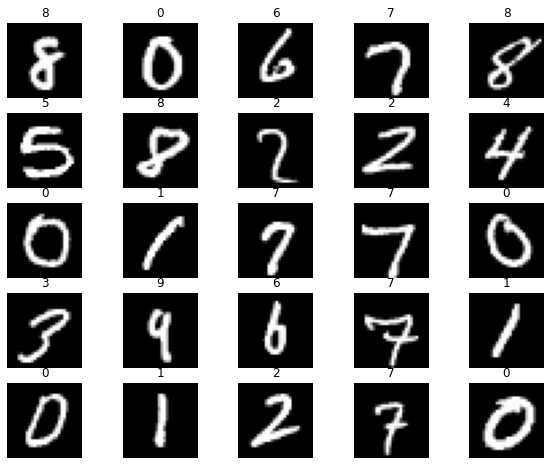

In [3]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### CNN
##### structure
- Convolution 1 : channels 16, kernel size 5, stride 1, padding 2 (output resolution?)
- ReLU
- MaxPool : kernel_size 2, stride 2
- Convlution 2 : channels 32, kernel size 5, stride 1, padding 2 (output resolution?)
- Linear : output channels 10 

##### https://pytorch.org/docs/1.12/nn.html

In [25]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1,
                               out_channels = 16,
                               kernel_size = 5,
                               stride = 2,
                               padding = 2)
        self.conv2 = nn.Conv2d(in_channels = 16,
                               out_channels = 32,
                               kernel_size = 5,
                               stride = 2,
                               padding = 2)
        self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(512,10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        return x

x = torch.randn(16,1,28,28)
cnn = CNN()
ret = cnn(x)

#### Train

In [26]:
cnn = CNN()
loss_func = nn.CrossEntropyLoss()   
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

In [28]:
# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader_train):
        output = cnn(images)              
        loss = loss_func(output, labels)

        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}], Loss: {:.4f}' 
                   .format(epoch + 1, num_epochs, i + 1, loss.item()))

Epoch [1/5], Step [100], Loss: 0.3379
Epoch [1/5], Step [200], Loss: 0.3354
Epoch [1/5], Step [300], Loss: 0.0816
Epoch [1/5], Step [400], Loss: 0.2206
Epoch [1/5], Step [500], Loss: 0.6455
Epoch [1/5], Step [600], Loss: 0.0072
Epoch [1/5], Step [700], Loss: 0.5325
Epoch [1/5], Step [800], Loss: 0.6849
Epoch [1/5], Step [900], Loss: 0.0037
Epoch [1/5], Step [1000], Loss: 0.4103
Epoch [1/5], Step [1100], Loss: 0.4336
Epoch [1/5], Step [1200], Loss: 0.0120
Epoch [1/5], Step [1300], Loss: 0.3814
Epoch [1/5], Step [1400], Loss: 0.0434
Epoch [1/5], Step [1500], Loss: 0.3427
Epoch [1/5], Step [1600], Loss: 1.0851
Epoch [1/5], Step [1700], Loss: 0.5544
Epoch [1/5], Step [1800], Loss: 0.4979
Epoch [1/5], Step [1900], Loss: 0.0182
Epoch [1/5], Step [2000], Loss: 0.0649
Epoch [1/5], Step [2100], Loss: 0.9828
Epoch [1/5], Step [2200], Loss: 0.8841
Epoch [1/5], Step [2300], Loss: 0.0145
Epoch [1/5], Step [2400], Loss: 0.1573
Epoch [1/5], Step [2500], Loss: 0.0698
Epoch [1/5], Step [2600], Loss: 1.

#### Test

In [31]:
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
        test_output = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        correct += (pred_y == labels).sum().item()
        total += labels.size(0)
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 94.88 Percent
